In [1]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
terms = pd.read_excel("/home/gddaslab/mxp140/sclerosis_project/miRNA_signal_hsa_number2.xlsx", engine='openpyxl', sheet_name='Sheet2')
display(terms)
df1 = pd.read_excel("/home/gddaslab/mxp140/sclerosis_project/miRNA_signal_hsa_number2.xlsx", engine='openpyxl', sheet_name='Sheet1')
display(df1)
df2 = pd.read_excel("/home/gddaslab/mxp140/sclerosis_project/ancova_adjusted_adult_data2.xlsx", engine='openpyxl')
display(df2)

,Acronym,Meaning,Number of patients
0,pHC,pediatric healthy control,10
1,aHC,adult healthy control (Normal Donor ND),5
2,sMS,adult stable MS,4
3,aMS,adult active MS,5
4,aPOMS,active peds MS,8
5,sPOMS,stable peds MS,3
6,pBar,pediatric bariatric,6


,ID,Transcript_ID,pHC1,pHC2,pHC3,pHC4,pHC5,pHC6,pHC7,pHC8,...,aPOMS9,sPOMS1,sPOMS2,sPOMS3,pBar2,pBar3,pBar5,pBar7,pBar8,pBar9
0,20500717,hsa-miR-1,1.81,2.27,1.75,2.49,1.93,1.63,1.83,1.69,...,1.51,1.87,1.55,1.89,2.37,1.89,1.98,1.98,1.99,1.44
1,20534748,hsa-mir-1-1,1.73,1.60,1.80,2.27,1.60,1.92,1.67,1.74,...,2.06,2.20,2.36,1.91,2.24,1.79,1.70,1.90,1.84,2.24
2,20534749,hsa-mir-1-1,1.62,1.53,1.81,2.16,1.62,2.00,1.63,1.74,...,1.83,2.04,1.94,1.94,1.87,1.70,1.60,1.79,1.73,2.07
3,20534568,hsa-mir-1-2,1.60,1.72,2.09,2.29,1.89,2.00,1.70,2.17,...,1.86,1.67,1.93,2.03,2.05,1.68,2.03,1.77,1.90,1.97
4,20534569,hsa-mir-1-2,1.60,1.94,2.09,2.29,2.08,1.91,1.88,2.17,...,1.85,1.67,2.01,2.03,2.02,1.68,2.03,2.04,1.89,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,20500182,hsa-miR-99a-3p,2.08,1.48,1.70,1.77,1.73,1.93,2.09,1.71,...,1.63,1.51,1.75,2.11,1.92,2.01,1.79,1.59,1.71,1.84
4566,20500181,hsa-miR-99a-5p,2.19,2.05,2.03,1.86,2.12,2.38,2.30,1.81,...,1.89,1.52,1.52,1.88,1.48,1.93,1.45,1.90,1.86,2.10
4567,20534825,hsa-mir-99b,1.99,1.53,2.35,2.05,1.73,1.98,2.29,1.97,...,2.08,2.57,2.28,3.17,1.64,1.96,2.27,1.79,1.94,1.89
4568,20501177,hsa-miR-99b-3p,2.37,2.09,1.92,1.71,1.55,1.33,1.60,1.61,...,2.49,2.63,2.28,2.19,1.62,1.68,1.96,1.95,1.87,2.08


,Unnamed: 0,sMS1,sMS2,sMS4,sMS5,aMS1,aMS2,aMS3,aMS4,aMS5,aND1,aND2,aND3,aND4,aND5
0,hsa-mir-124-1,0.813547,0.300343,0.293471,0.225105,0.533394,0.724991,0.268452,0.855029,0.611683,0.501721,0.855400,0.718413,0.623509,0.765144
1,hsa-mir-124-2,0.813547,0.300343,0.293471,0.225105,0.533394,0.724991,0.268452,0.855029,0.611683,0.501721,0.855400,0.718413,0.623509,0.765144
2,hsa-mir-124-3,0.813547,0.300343,0.293471,0.225105,0.533394,0.724991,0.268452,0.855029,0.611683,0.501721,0.855400,0.718413,0.623509,0.765144
3,hsa-mir-6742,0.847233,1.067314,1.542275,1.331042,1.187316,0.908604,0.743535,1.206083,0.903590,1.121069,1.083533,1.026056,0.999754,1.088521
4,hsa-miR-370-5p,0.946431,1.131797,0.920476,0.737162,1.124521,1.193229,1.056487,0.931207,1.231881,1.219858,1.063763,1.008510,1.618453,1.185139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,hsa-miR-5196-5p,4.546187,4.539880,4.770658,3.757521,4.695129,4.354227,3.896776,4.091992,3.582737,4.180501,3.731527,4.169011,3.768422,3.815285
1191,hsa-miR-1247-3p,4.741667,4.560000,5.001667,3.341667,4.561667,3.991667,3.861667,3.961667,4.081667,4.471667,3.510000,4.151667,2.931667,3.321667
1192,hsa-miR-4530,5.202500,4.770000,3.662500,3.202500,4.682500,3.892500,4.972500,4.502500,4.042500,4.112500,3.410000,4.092500,2.842500,3.872500
1193,hsa-miR-4688,5.278046,4.428851,4.572746,4.124704,4.777446,4.381754,4.523921,5.129404,4.950187,5.727837,5.345327,5.826271,4.580396,4.772354


In [105]:
X = df2.iloc[:, 1:].T.values
display(f'X:{X}')
display(f'Shape:{X.shape}')

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check if CUDA is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Available device:', device)

# Convert to PyTorch tensor and move to GPU if available
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)

# Perform PCA using torch.pca_lowrank
U, S, V = torch.pca_lowrank(X_tensor)

# Calculate explained variance
explained_variance = S**2 / torch.sum(S**2)
cumulative_explained_variance = torch.cumsum(explained_variance, dim=0)

'X:[[0.81354679 0.81354679 0.81354679 ... 5.2025     5.27804639 7.62      ]\n [0.30034301 0.30034301 0.30034301 ... 4.77       4.42885136 7.89      ]\n [0.29347056 0.29347056 0.29347056 ... 3.6625     4.57274609 7.75      ]\n ...\n [0.71841339 0.71841339 0.71841339 ... 4.0925     5.82627086 8.04      ]\n [0.62350867 0.62350867 0.62350867 ... 2.8425     4.58039624 7.95      ]\n [0.76514358 0.76514358 0.76514358 ... 3.8725     4.77235445 6.82      ]]'

'Shape:(14, 1195)'

Available device: cuda


In [106]:
explained_variance

tensor([0.3181, 0.2710, 0.1307, 0.0993, 0.0918, 0.0891], device='cuda:0')

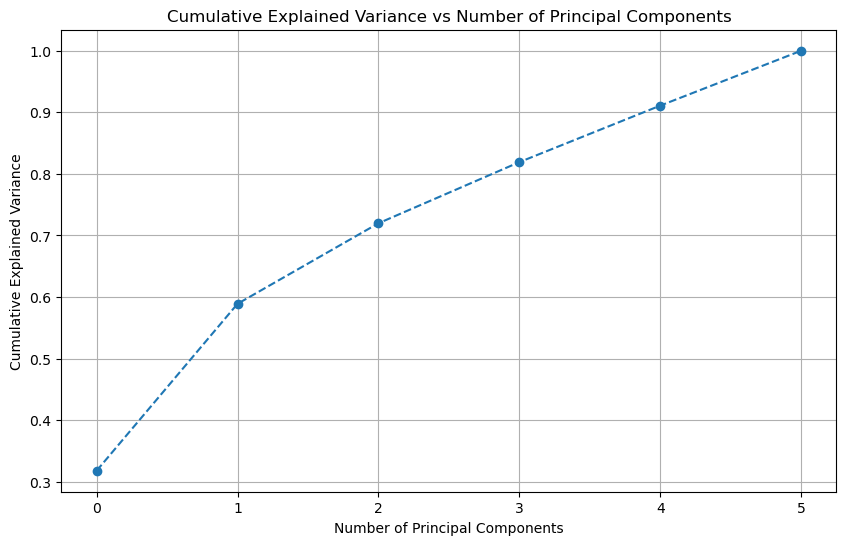

Number of principal components to retain 95% variance: 6


In [107]:
# Plot the cumulative explained variance
cumulative_explained_variance_cpu = cumulative_explained_variance.cpu().numpy()
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance_cpu, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid(True)
plt.show()

# Determine the number of components to keep (e.g., explaining 95% of the variance)
threshold = 0.95
num_components = (cumulative_explained_variance >= threshold).nonzero(as_tuple=True)[0].min().item() + 1
print(f'Number of principal components to retain 95% variance: {num_components}')

In [108]:
V

tensor([[-0.0236, -0.0262, -0.0080,  0.0229,  0.0436,  0.0407],
        [-0.0236, -0.0262, -0.0080,  0.0229,  0.0436,  0.0407],
        [-0.0236, -0.0262, -0.0080,  0.0229,  0.0436,  0.0407],
        ...,
        [-0.0273,  0.0341, -0.0478,  0.0360,  0.0016,  0.0059],
        [-0.0139, -0.0362, -0.0682,  0.0057,  0.0059,  0.0127],
        [-0.0444,  0.0075, -0.0142,  0.0304, -0.0100, -0.0295]],
       device='cuda:0')

In [109]:
# Project the data onto the principal components
PC = torch.matmul(X_tensor, V[:, :num_components])
PC

tensor([[  5.1237,  17.8268, -13.3532,  15.0456,   6.0720,   1.8120],
        [  9.6585,  11.8312,  -3.8103,   4.0601,  -1.0953,  -5.6389],
        [ 19.1657,  10.7274, -11.8966, -15.1214,  -7.6067,  -2.8870],
        [ 37.2339,  13.6525,  16.3159,  -2.5007,   1.9146,   2.3462],
        [-18.7784,   6.9646,  -3.5709,  -7.1960,  18.4852, -10.9512],
        [ -8.5309,   6.8653,  11.1358,  17.2955,   0.1616,  -2.3301],
        [-25.1414,  12.4643,   7.0267,   2.0667, -16.5202,  -2.0873],
        [-11.7094,   6.6826,  -0.8504,  -6.2973,   9.8566,  20.6077],
        [-14.6422,   7.2545,   0.9659,  -9.2898,  -9.8742,   0.7916],
        [  6.8733, -22.2198, -17.0333,   7.9067,  -3.1828,   5.7493],
        [ -9.2590, -12.9879,   0.6762,  -6.6685,   1.8325,   3.7356],
        [  2.5788, -17.4989,  -7.8496,   0.1260,  -2.9338, -12.5005],
        [  3.1340, -20.4339,  15.0175,  -2.0380,   6.9331,  -8.2330],
        [  4.2935, -21.1287,   7.2263,   2.6110,  -4.0426,   9.5856]],
       device='cuda

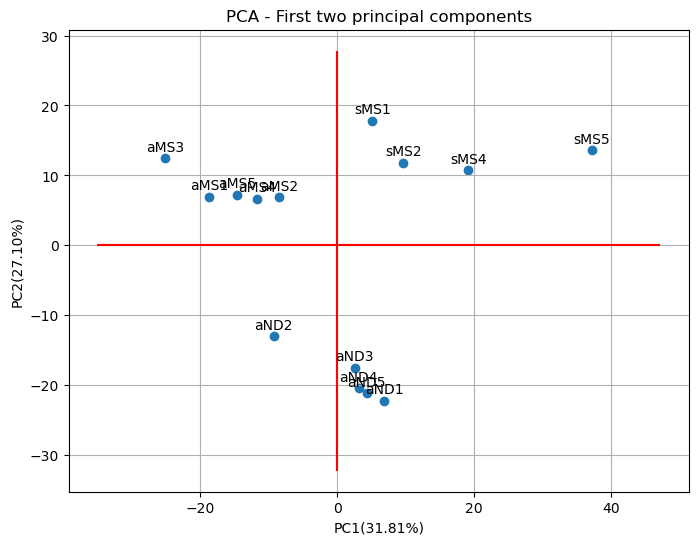

In [110]:
# Get the first two principal components
pc1 = PC[:, 0].cpu().numpy()  # Convert to numpy array and move to CPU
pc2 = PC[:, 1].cpu().numpy()  # Convert to numpy array and move to CPU

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2,)
plt.vlines(x=0, ymin=min(pc2)-10, ymax=max(pc2)+10, color='red')
plt.hlines(y=0, xmin=min(pc1)-10, xmax=max(pc1)+10, color='red')
explained_variance_cpu = explained_variance.cpu().numpy()
plt.xlabel(f'PC1({(explained_variance_cpu[0]*100):.2f}%)')
plt.ylabel(f'PC2({(explained_variance_cpu[1]*100):.2f}%)')
plt.title('PCA - First two principal components')
plt.grid(True)
# Annotate each point
annotations = list(df2.columns[1:])
for i, label in enumerate(annotations):
    plt.annotate(label, (pc1[i], pc2[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

In [111]:
V

tensor([[-0.0236, -0.0262, -0.0080,  0.0229,  0.0436,  0.0407],
        [-0.0236, -0.0262, -0.0080,  0.0229,  0.0436,  0.0407],
        [-0.0236, -0.0262, -0.0080,  0.0229,  0.0436,  0.0407],
        ...,
        [-0.0273,  0.0341, -0.0478,  0.0360,  0.0016,  0.0059],
        [-0.0139, -0.0362, -0.0682,  0.0057,  0.0059,  0.0127],
        [-0.0444,  0.0075, -0.0142,  0.0304, -0.0100, -0.0295]],
       device='cuda:0')

In [112]:
V[:, :2]

tensor([[-0.0236, -0.0262],
        [-0.0236, -0.0262],
        [-0.0236, -0.0262],
        ...,
        [-0.0273,  0.0341],
        [-0.0139, -0.0362],
        [-0.0444,  0.0075]], device='cuda:0')

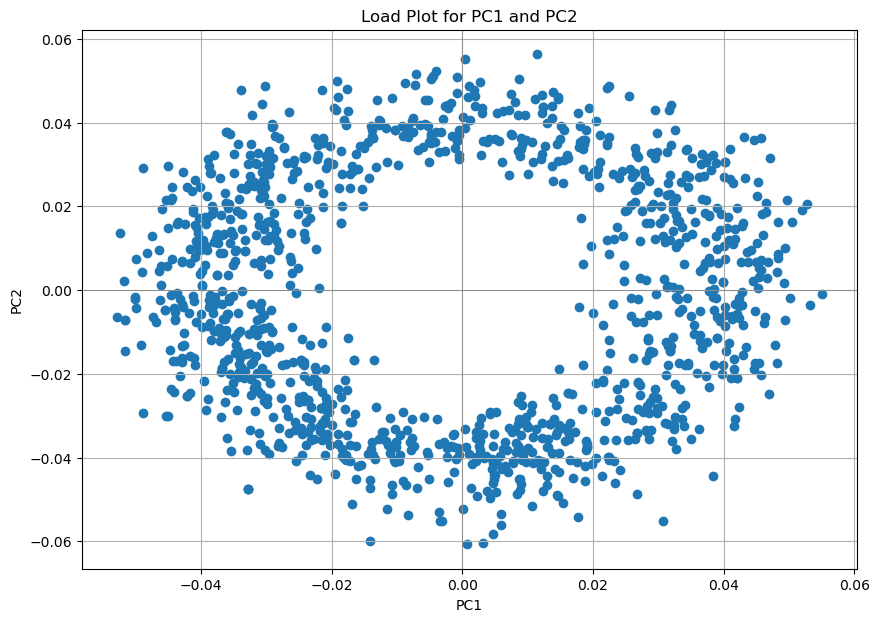

In [113]:
# Loadings are the principal axes in feature space, which are the rows of V
loadings = V[:, :2].cpu().numpy()

# Plotting
plt.figure(figsize=(10, 7))

# Plot PC1 vs PC2 loadings
plt.scatter(loadings[:, 0], loadings[:, 1])

# Annotate each point with the feature name (assuming you have feature names)
features = [f'Feature {i+1}' for i in range(X.shape[1])]
# for i, feature in enumerate(features):
#     plt.annotate(feature, (loadings[i, 0], loadings[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Load Plot for PC1 and PC2')
plt.grid()
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.show()


In [114]:
# Identify top n feature contributions to prinicipal components
# Create a DataFrame for easier handling
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
#display(loadings_df)
# Find top 10 contributing features for each principal component
top_features = {}
for pc in loadings_df.columns:
    top_features[pc] = loadings_df[pc].abs().nlargest(10).index

# Convert indices to feature names
top_feature_names = {pc: [df2.iloc[:, 0][i] for i in top_features[pc]] for pc in top_features}

top_feature_df = pd.DataFrame(top_feature_names)
display(top_feature_df)

,PC1,PC2
0,hsa-miR-8076,hsa-mir-5194
1,hsa-miR-657,hsa-miR-3194-3p
2,hsa-miR-425-3p,hsa-miR-4436a
3,hsa-mir-1205,hsa-miR-6821-5p
4,hsa-mir-4459,hsa-miR-5004-3p
5,hsa-miR-3942-3p,hsa-mir-181b-2
6,hsa-miR-5693,hsa-mir-491
7,hsa-miR-3907,hsa-miR-31-3p
8,hsa-mir-1185-1,hsa-miR-487a-5p
9,hsa-mir-1185-2,hsa-mir-449c


# K-means clustering of the 1st two principal components

In [115]:
from sklearn.cluster import KMeans

In [122]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(PC[:, :2].cpu().numpy())

KMeans(n_clusters=3, random_state=2)

In [123]:
cluster_centers = kmeans.cluster_centers_
print(f'Cluster centers:\n{cluster_centers}')
cluster_labels = kmeans.labels_
print(f'Cluster labels:\n{cluster_labels}')

Cluster centers:
[[-15.760483    8.046259 ]
 [  1.5241168 -18.853838 ]
 [ 17.795456   13.509476 ]]
Cluster labels:
[2 2 2 2 0 0 0 0 0 1 1 1 1 1]


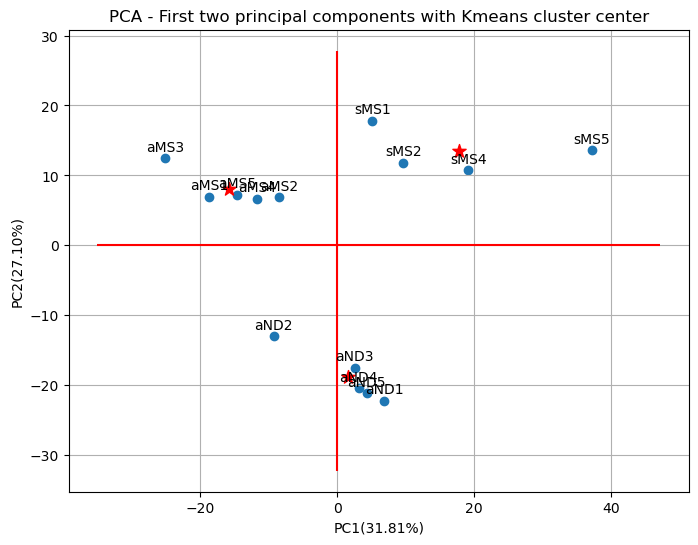

In [124]:
# Get the first two principal components
pc1 = PC[:, 0].cpu().numpy()  # Convert to numpy array and move to CPU
pc2 = PC[:, 1].cpu().numpy()  # Convert to numpy array and move to CPU

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2,)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=100, color='red')
plt.vlines(x=0, ymin=min(pc2)-10, ymax=max(pc2)+10, color='red')
plt.hlines(y=0, xmin=min(pc1)-10, xmax=max(pc1)+10, color='red')
explained_variance_cpu = explained_variance.cpu().numpy()
plt.xlabel(f'PC1({(explained_variance_cpu[0]*100):.2f}%)')
plt.ylabel(f'PC2({(explained_variance_cpu[1]*100):.2f}%)')
plt.title('PCA - First two principal components with Kmeans cluster center')
plt.grid(True)
# Annotate each point
annotations = list(df2.columns[1:])
for i, label in enumerate(annotations):
    plt.annotate(label, (pc1[i], pc2[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=1)
clf.fit(X_scaled, kmeans.labels_)
display('But what will I predict upon! may be leave one out type of prediction.')

'But what will I predict upon!'